#   Sentiment Analysis of amazon product- Oximeter

https://www.amazon.in/DR-Oximeter-Fingertip-Monitor-Approved/dp/B08D3KXF9Y/ref=cm_cr_arp_d_product_top?ie=UTF8&th=1

In [94]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
import string
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [95]:
#load dataset
reviews = pd.read_csv('OxiReviews.csv')

In [96]:
reviews.head()

,title,rating,body
0,"If you want to panic, or IF YOU WANT TO BE BRI...",1,The first reading this morning showed I had bl...
1,Snoopy has a pulse and an oxygen reading!,1,How can we trust this device when stuffed anim...
2,Inaccurate,1,Least accurate pulse Ox I came across. I am a ...
3,This product does not give accurate readings.,1,Look at this carrot! It’s alive!
4,I cannot trust this devide readings.,1,"How something that doesn't have a pulse, no bl..."


In [97]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   999 non-null    object
 1   rating  1000 non-null   int64 
 2   body    999 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


# Rating Graph

<AxesSubplot:ylabel='rating'>

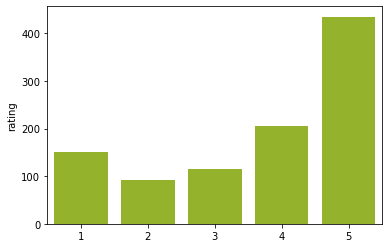

In [98]:
import seaborn as sns
count = reviews['rating'].value_counts()
sns.barplot(x=count.index, y = count, color = '#a2c816')

In [99]:
reviews['rating'].value_counts()

5    435
4    206
1    150
3    116
2     93
Name: rating, dtype: int64

In [100]:
reviews = reviews.dropna(axis=0)

In [101]:
reviews.isnull().sum()

title     0
rating    0
body      0
dtype: int64

In [102]:
body = reviews['body']
rv = " ".join(body)


In [103]:
#To remove punctuation 
no_punc_text = rv.translate(str.maketrans('', '', string.punctuation))

In [104]:
# print(no_punc_text)

In [105]:
#To Create tokens
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['The', 'first', 'reading', 'this', 'morning', 'showed', 'I', 'had', 'blood', 'oxygenation', 'of', '99', 'with', 'a', 'pulse', 'of', '40', 'Confident', 'that', 'I', 'am', 'NOT', 'Michael', 'Jordan', 'I', 'tried', 'a', 'multidevice', 'comparison', 'In', 'this', 'my', 'blood', 'pressure', 'tester', 'showed', 'a', 'pulse', 'of', '76', 'my', 'cheap', 'pink', 'meter', 'showed', 'a', 'pulse', 'of', '74', 'and']


In [106]:
len(text_tokens)

57410

In [107]:
#Remove Stopwords by NLTK
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [108]:
my_stop_words = stopwords.words('english')
li = ['the','The', 'in','I', 'This','its','it','It', 'dont', 'a', 'He', 'Im', 'as']
for i in li:
    my_stop_words.append(i)
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:40])

['first', 'reading', 'morning', 'showed', 'blood', 'oxygenation', '99', 'pulse', '40', 'Confident', 'NOT', 'Michael', 'Jordan', 'tried', 'multidevice', 'comparison', 'In', 'blood', 'pressure', 'tester', 'showed', 'pulse', '76', 'cheap', 'pink', 'meter', 'showed', 'pulse', '74', 'SantaMedical', 'showed', 'pulse', '56', 'BP', 'tester', 'left', 'arm', 'two', 'finger', 'meters']


In [109]:
# Normalization
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['first', 'reading', 'morning', 'showed', 'blood', 'oxygenation', '99', 'pulse', '40', 'confident', 'not', 'michael', 'jordan', 'tried', 'multidevice', 'comparison', 'in', 'blood', 'pressure', 'tester', 'showed', 'pulse', '76', 'cheap', 'pink']


In [110]:
nlp = spacy.load('en_core_web_sm') 

In [111]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

first reading morning showed blood oxygenation 99 pulse 40 Confident NOT Michael Jordan tried multidevice comparison In blood pressure tester showed pulse 76 cheap pink meter showed pulse 74 SantaMedical showed pulse 56 BP tester left arm two finger meters


In [112]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['first', 'reading', 'morning', 'show', 'blood', 'oxygenation', '99', 'pulse', '40', 'confident', 'not', 'Michael', 'Jordan', 'try', 'multidevice', 'comparison', 'in', 'blood', 'pressure', 'tester', 'show', 'pulse', '76', 'cheap', 'pink']


In [113]:
#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [114]:
# print(vectorizer.vocabulary_)

<AxesSubplot:xlabel='Date', ylabel='DateValue'>

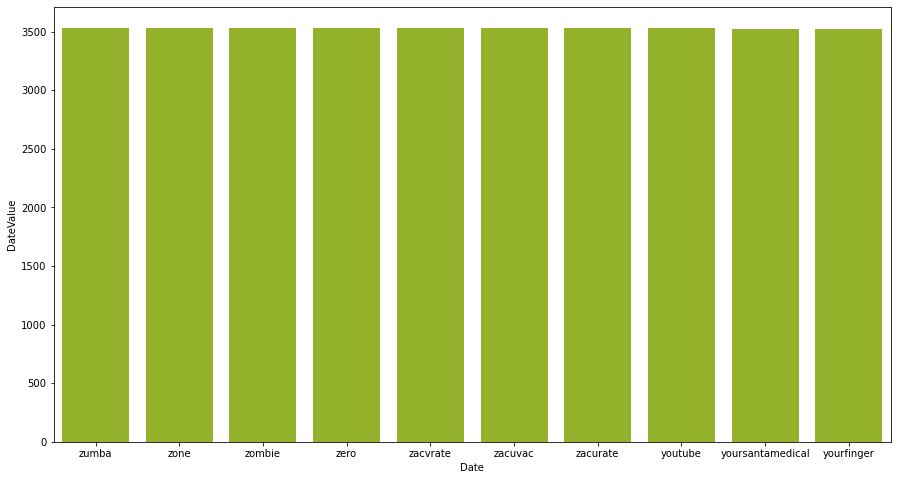

In [115]:
import seaborn as sns
dic = vectorizer.vocabulary_
data = pd.DataFrame(dic.items(), columns=['Date', 'DateValue'])
data0=data.sort_values('DateValue',ascending = False)[:10]
plt.figure(figsize = (15, 8))
sns.barplot(x='Date', y="DateValue", data = data0, color='#a2c816')


In [116]:
data0.to_csv(r'wordsFinalFreq.csv', index=False)
data0.head(10)

,Date,DateValue
2889,zumba,3534
3092,zone,3533
3170,zombie,3532
779,zero,3531
1318,zacvrate,3530
765,zacuvac,3529
847,zacurate,3528
1702,youtube,3527
2749,yoursantamedical,3526
2311,yourfinger,3525


In [117]:
#Create Wordcloud
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

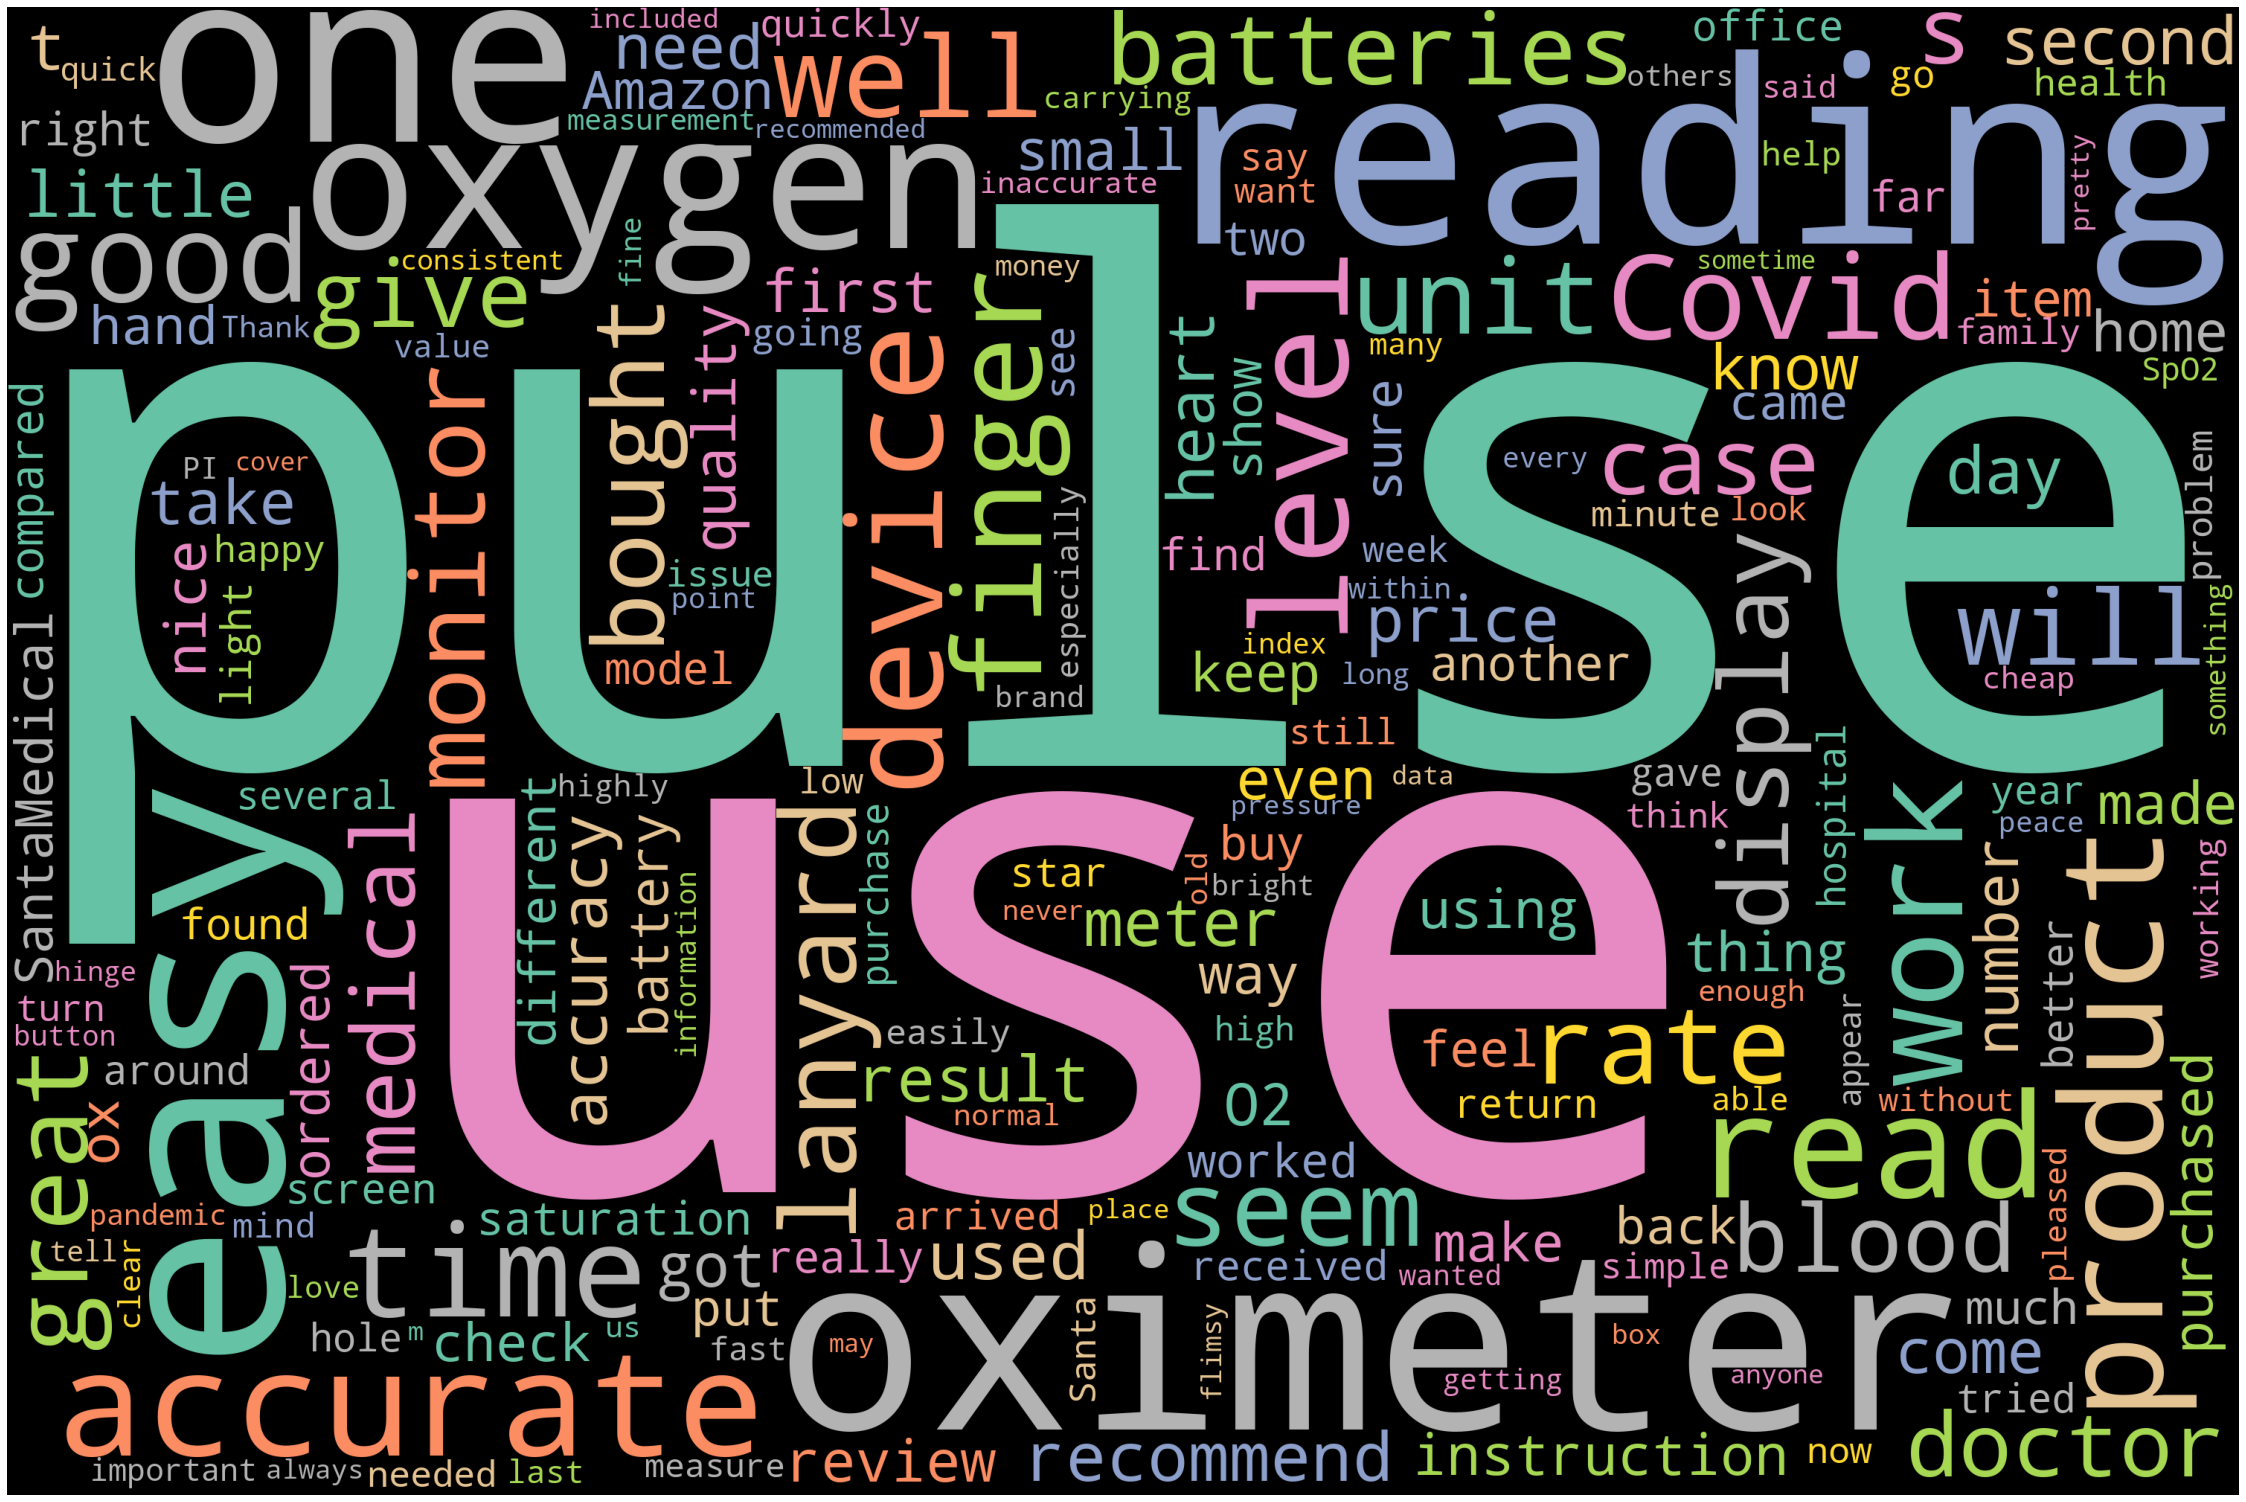

In [118]:
stopwords = STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(rv)
plot_cloud(wordcloud)

In [119]:
wordcloud.to_file("wordCLFinal.png")

In [120]:
#Classify review on basis of rating column into positive and negative
df = []
for i in reviews['rating']:
    if i<=2:
        i='Negative'
    elif i == 3:
        i='Neutral'
    elif i >=4:
        i='Positive'
    df.append(i)
df
reviews['Classify'] = pd.DataFrame(df)

In [121]:
reviews.head(1000)

,title,rating,body,Classify
0,"If you want to panic, or IF YOU WANT TO BE BRI...",1,The first reading this morning showed I had bl...,Negative
1,Snoopy has a pulse and an oxygen reading!,1,How can we trust this device when stuffed anim...,Negative
2,Inaccurate,1,Least accurate pulse Ox I came across. I am a ...,Negative
3,This product does not give accurate readings.,1,Look at this carrot! It’s alive!,Negative
4,I cannot trust this devide readings.,1,"How something that doesn't have a pulse, no bl...",Negative
...,...,...,...,...
995,clear screen,5,everyone should have one of these. Once your o...,Positive
996,Good pulseoximeter for a good price worth it 😍,5,"I liked pulseoximeter,easy to handle and easy ...",Positive
997,Easy to use and accurate,5,All you have to do is insert the batteries (in...,Positive
998,Works perfectly and is nice to have around.,5,"This was easy to use, simple to read, and I lo...",Positive


In [122]:
pct_Classify = reviews['Classify'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pct_Classify

Positive    64.2%
Negative    24.3%
Neutral     11.4%
Name: Classify, dtype: object

##  Vader Sentiment Analysis

In [123]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [124]:
def classify_compound(text, threshold=0.33):
     
    # initialize VADER
    sid = SentimentIntensityAnalyzer()
     
    # Calling the polarity_scores method on sid and passing in the text
    # outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    scores = sid.polarity_scores(text)
     
    # get compound score
    score = scores['compound']
     
    # translate the score into the correcponding input according to the threshold
    if score <= -threshold: return 'Negative'
    elif score >= threshold: return 'Positive'
    else: return 'Neutral'

In [125]:
reviews['compound_sentiment'] = reviews.body.apply(lambda text: classify_compound(text))

In [126]:
reviews.head(10)

,title,rating,body,Classify,compound_sentiment
0,"If you want to panic, or IF YOU WANT TO BE BRI...",1,The first reading this morning showed I had bl...,Negative,Negative
1,Snoopy has a pulse and an oxygen reading!,1,How can we trust this device when stuffed anim...,Negative,Positive
2,Inaccurate,1,Least accurate pulse Ox I came across. I am a ...,Negative,Negative
3,This product does not give accurate readings.,1,Look at this carrot! It’s alive!,Negative,Positive
4,I cannot trust this devide readings.,1,"How something that doesn't have a pulse, no bl...",Negative,Positive
5,Defective device,1,I bought this item a week ago and it does not ...,Negative,Positive
6,Disappointed all around...,1,"I received the pulse oximeter a few days ago, ...",Negative,Positive
7,Poor instructions and customer support.,1,The instructions for the device are insufficie...,Negative,Positive
8,Don't waste your money,1,The SPo2 reading bounces all over the place. E...,Negative,Positive
9,Wildly inaccurate,1,I experimented and put a pen in it. It read 9...,Negative,Positive


In [127]:
pct_cs = reviews['compound_sentiment'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pct_cs

Positive    63.5%
Neutral     24.6%
Negative    11.9%
Name: compound_sentiment, dtype: object

(array([119.,   0.,   0.,   0.,   0., 634.,   0.,   0.,   0., 246.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

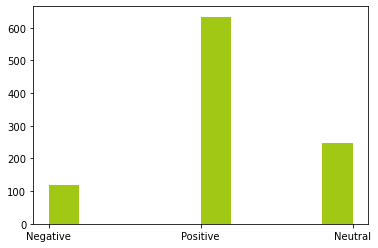

In [128]:
plt.hist(reviews['compound_sentiment'],color='#a2c816')

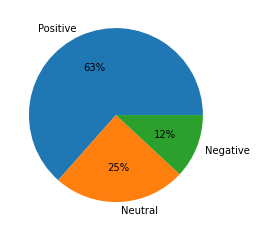

In [129]:
label = [ 'Positive', 'Neutral', 'Negative']
plt.pie(reviews['compound_sentiment'].value_counts(), labels=label,autopct='%.0f%%')
plt.show() 

### We comparing  classification of  Vader with Ratings percentage

In [130]:
pct_Classify   #Through Ratings

Positive    64.2%
Negative    24.3%
Neutral     11.4%
Name: Classify, dtype: object

In [131]:
pct_cs #Vader Classifier

Positive    63.5%
Neutral     24.6%
Negative    11.9%
Name: compound_sentiment, dtype: object

In [132]:
import re
def text_cleaner (text):
    clean_data= re.sub('[^a-zA-Z]', " ", text) 
    clean_data= clean_data.lower()
    clean_data = clean_data.split()
    clean_data= ' '.join(clean_data)
    return clean_data

In [133]:
reviews.dropna(subset = ["Classify"], inplace=True, axis=0)

In [134]:
reviews.isnull().sum()

title                 0
rating                0
body                  0
Classify              0
compound_sentiment    0
dtype: int64

In [135]:

reviews["Clean_review"]=reviews["body"].apply(lambda x: text_cleaner(str(x)))
reviews["sentiment"] = reviews["Classify"].map({'Positive': 1, 'Negative':0, 'Neutral':0})
reviews.head()

,title,rating,body,Classify,compound_sentiment,Clean_review,sentiment
0,"If you want to panic, or IF YOU WANT TO BE BRI...",1,The first reading this morning showed I had bl...,Negative,Negative,the first reading this morning showed i had bl...,0
1,Snoopy has a pulse and an oxygen reading!,1,How can we trust this device when stuffed anim...,Negative,Positive,how can we trust this device when stuffed anim...,0
2,Inaccurate,1,Least accurate pulse Ox I came across. I am a ...,Negative,Negative,least accurate pulse ox i came across i am a m...,0
3,This product does not give accurate readings.,1,Look at this carrot! It’s alive!,Negative,Positive,look at this carrot it s alive,0
4,I cannot trust this devide readings.,1,"How something that doesn't have a pulse, no bl...",Negative,Positive,how something that doesn t have a pulse no blo...,0


In [136]:
reviews["sentiment"].value_counts()

1    641
0    357
Name: sentiment, dtype: int64

## Feature extraction

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(binary=True)

In [138]:
x = cv.fit_transform(reviews["Clean_review"]).toarray()

In [139]:
y = reviews["sentiment"].values

In [140]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Modeling

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [142]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [143]:
from sklearn.naive_bayes import BernoulliNB , GaussianNB, MultinomialNB

In [144]:
bnb = BernoulliNB()
gnb= GaussianNB()
mnb= MultinomialNB()

## BernoulliNB

[[ 96  27]
 [ 31 176]]


              precision    recall  f1-score   support

           0       0.76      0.78      0.77       123
           1       0.87      0.85      0.86       207

    accuracy                           0.82       330
   macro avg       0.81      0.82      0.81       330
weighted avg       0.83      0.82      0.82       330

0.8669950738916257
0.8502415458937198
0.8585365853658536
0.8153646753858843


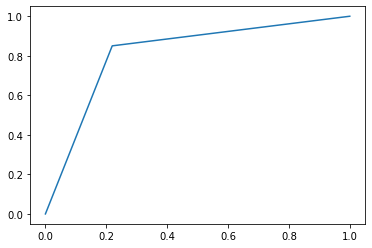

In [145]:
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(auc(fpr, tpr))

## GaussianNB

[[ 66  57]
 [ 27 180]]


              precision    recall  f1-score   support

           0       0.71      0.54      0.61       123
           1       0.76      0.87      0.81       207

    accuracy                           0.75       330
   macro avg       0.73      0.70      0.71       330
weighted avg       0.74      0.75      0.74       330

0.759493670886076
0.8695652173913043
0.8108108108108109
0.7030752916224814


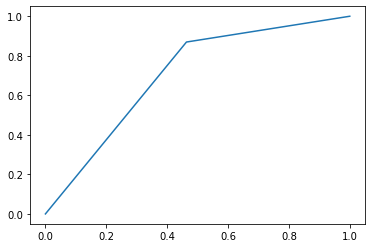

In [146]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(auc(fpr, tpr))

## MultinomialNB

[[ 76  47]
 [ 11 196]]


              precision    recall  f1-score   support

           0       0.87      0.62      0.72       123
           1       0.81      0.95      0.87       207

    accuracy                           0.82       330
   macro avg       0.84      0.78      0.80       330
weighted avg       0.83      0.82      0.82       330

0.8065843621399177
0.9468599033816425
0.8711111111111111
0.7823730411217156


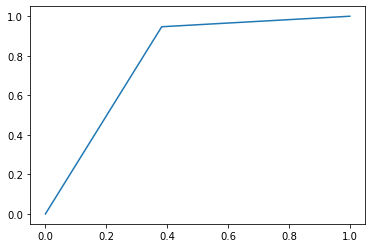

In [147]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(auc(fpr, tpr))

## LogisticRegression

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
lg = LogisticRegression()

[[ 86  37]
 [ 24 183]]


              precision    recall  f1-score   support

           0       0.78      0.70      0.74       123
           1       0.83      0.88      0.86       207

    accuracy                           0.82       330
   macro avg       0.81      0.79      0.80       330
weighted avg       0.81      0.82      0.81       330

0.8318181818181818
0.8840579710144928
0.8571428571428571
0.7916224814422057


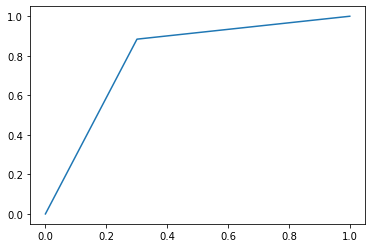

In [150]:
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(auc(fpr, tpr))

## Support Vector Classifier

In [151]:
from sklearn.svm import SVC
sv = SVC()

[[ 71  52]
 [ 19 188]]


              precision    recall  f1-score   support

           0       0.79      0.58      0.67       123
           1       0.78      0.91      0.84       207

    accuracy                           0.78       330
   macro avg       0.79      0.74      0.75       330
weighted avg       0.79      0.78      0.78       330

0.7833333333333333
0.9082125603864735
0.8411633109619687
0.7427241663720985


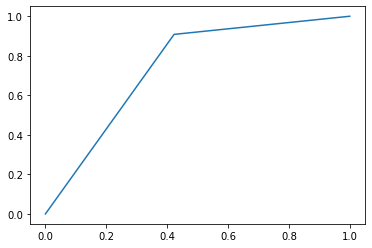

In [152]:
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(auc(fpr, tpr))

In [153]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [154]:
rf= RandomForestClassifier(n_estimators=300 , random_state=50)
ad= AdaBoostClassifier(n_estimators=300 , random_state=50)
gb = GradientBoostingClassifier(n_estimators=300 , random_state=5)
etc= ExtraTreesClassifier(n_estimators=300 , random_state=5)

In [155]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'n_estimators': [100,150,200,300,500],
#               'random_state': [10,20,30,40,50,60]}
# grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, refit = True, verbose = 3)
# grid_ad = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid, refit = True, verbose = 3)
# grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, refit = True, verbose = 3)
# grid_etc = GridSearchCV(ExtraTreesClassifier(), param_grid=param_grid, refit = True, verbose = 3)

In [156]:
# grid_rf.fit(X_train, y_train)

In [157]:
#grid_rf.best_params_

## Random Forest Classifier

[[ 63  60]
 [ 14 193]]


              precision    recall  f1-score   support

           0       0.82      0.51      0.63       123
           1       0.76      0.93      0.84       207

    accuracy                           0.78       330
   macro avg       0.79      0.72      0.73       330
weighted avg       0.78      0.78      0.76       330

0.7628458498023716
0.9323671497584541
0.8391304347826086
0.7222811358548369


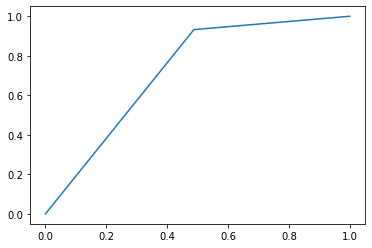

In [158]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(auc(fpr, tpr))

## AdaBoost Classifier

[[ 88  35]
 [ 31 176]]


              precision    recall  f1-score   support

           0       0.74      0.72      0.73       123
           1       0.83      0.85      0.84       207

    accuracy                           0.80       330
   macro avg       0.79      0.78      0.78       330
weighted avg       0.80      0.80      0.80       330

0.8341232227488151
0.8502415458937198
0.8421052631578947
0.7828443501826323


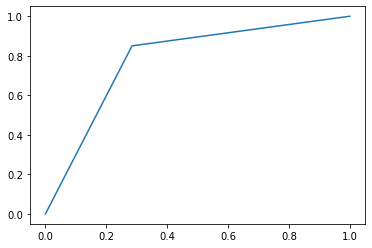

In [159]:
ad.fit(X_train, y_train)
y_pred = ad.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(auc(fpr, tpr))

## GradientBoosting Classifier

[[ 78  45]
 [ 23 184]]


              precision    recall  f1-score   support

           0       0.77      0.63      0.70       123
           1       0.80      0.89      0.84       207

    accuracy                           0.79       330
   macro avg       0.79      0.76      0.77       330
weighted avg       0.79      0.79      0.79       330

0.8034934497816594
0.8888888888888888
0.8440366972477064
0.7615176151761518


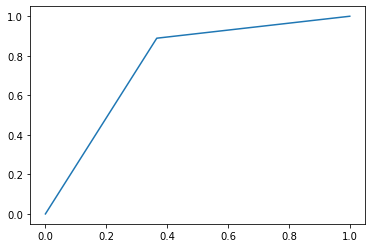

In [160]:
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(auc(fpr, tpr))

## ExtraTrees Classifier

[[ 65  58]
 [ 14 193]]


              precision    recall  f1-score   support

           0       0.82      0.53      0.64       123
           1       0.77      0.93      0.84       207

    accuracy                           0.78       330
   macro avg       0.80      0.73      0.74       330
weighted avg       0.79      0.78      0.77       330

0.7689243027888446
0.9323671497584541
0.8427947598253276
0.7304112171556498


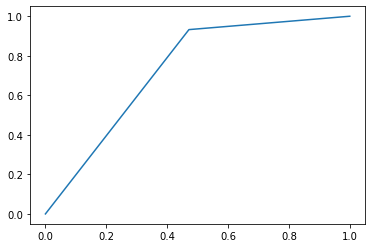

In [161]:
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(auc(fpr, tpr))

## DecisionTree Classifier 

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
dt = DecisionTreeClassifier()

[[ 69  54]
 [ 40 167]]


              precision    recall  f1-score   support

           0       0.63      0.56      0.59       123
           1       0.76      0.81      0.78       207

    accuracy                           0.72       330
   macro avg       0.69      0.68      0.69       330
weighted avg       0.71      0.72      0.71       330

0.755656108597285
0.8067632850241546
0.780373831775701
0.6838694473901261


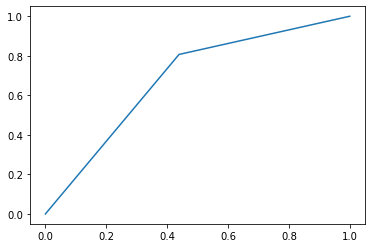

In [164]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(auc(fpr, tpr))

## VotingClassifier

In [165]:
from sklearn.ensemble import VotingClassifier

In [166]:
vote_hard = VotingClassifier(estimators=[('lr', lg), ('bnb', bnb), ('ad', ad), ('mnb', mnb)], voting='hard')

In [167]:
vote_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('bnb', BernoulliNB()),
                             ('ad',
                              AdaBoostClassifier(n_estimators=300,
                                                 random_state=50)),
                             ('mnb', MultinomialNB())])

[[ 95  28]
 [ 26 181]]


              precision    recall  f1-score   support

           0       0.79      0.77      0.78       123
           1       0.87      0.87      0.87       207

    accuracy                           0.84       330
   macro avg       0.83      0.82      0.82       330
weighted avg       0.84      0.84      0.84       330

0.8660287081339713
0.8743961352657005
0.8701923076923077
0.823376929421468


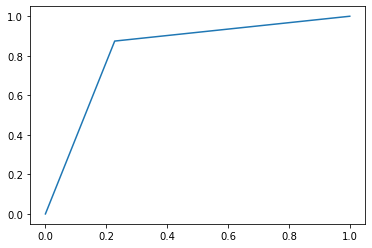

In [168]:
vote_hard.fit(X_train, y_train)
y_pred = vote_hard.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(auc(fpr, tpr))

In [169]:
vote_soft = VotingClassifier(estimators=[('lr', lg), ('bnb', bnb), ('ad', ad), ('mnb', mnb)], voting='soft')

[[ 93  30]
 [ 18 189]]


              precision    recall  f1-score   support

           0       0.84      0.76      0.79       123
           1       0.86      0.91      0.89       207

    accuracy                           0.85       330
   macro avg       0.85      0.83      0.84       330
weighted avg       0.85      0.85      0.85       330

0.863013698630137
0.9130434782608695
0.8873239436619719
0.8345705196182397


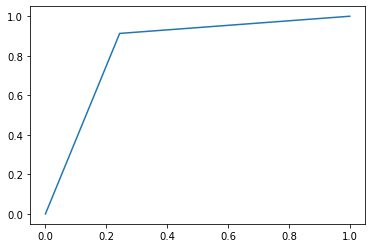

In [170]:
vote_soft.fit(X_train, y_train)
y_pred = vote_soft.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(auc(fpr, tpr))

In [171]:
text = 'not better quality product'
clean_data= text_cleaner(text)
clean_data
cv1=cv.transform([clean_data])

In [172]:
bnb.predict(cv1)

array([0], dtype=int64)

In [173]:
ad.predict(cv1)

array([0], dtype=int64)

In [174]:
mnb.predict(cv1)

array([0], dtype=int64)

In [175]:
lg.predict(cv1)

array([0], dtype=int64)

In [176]:
vote_hard.predict(cv1)

array([0], dtype=int64)

In [177]:
vote_soft.predict(cv1)

array([0], dtype=int64)

In [178]:
#import pickle

In [179]:
#file1 = open("G:/Project/Final data/Model_Voting_soft.pk","wb")
#pickle.dump(vote_soft , file1)

In [180]:
#file2 = open("G:/Project/Final data/Model_Voting_hard.pk","wb")
#pickle.dump(vote_hard , file)

In [181]:
# file = open("F:ExcelR/Project 88/vector.pkl","wb")
# pickle.dump(cv , file2)

In [182]:
#  loaded_model=pickle.load(open("G:/Project/Final data/Model_Voting_soft.pkl","rb"))